In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import pandas as pd


In [2]:
file = np.load("./simulation_history.npz")

In [3]:
xs = file["Xs"]
us = file["Us"]
errors = file["errs"]

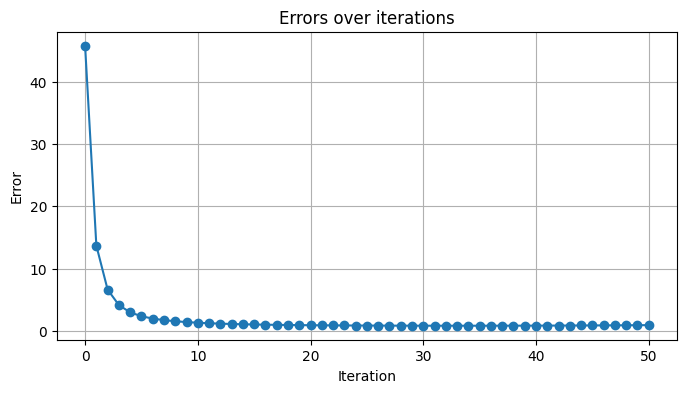

In [4]:
plt.figure(figsize=(8,4))
plt.plot(errors, marker='o', linestyle='-')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Errors over iterations')
plt.grid(True)
plt.show()

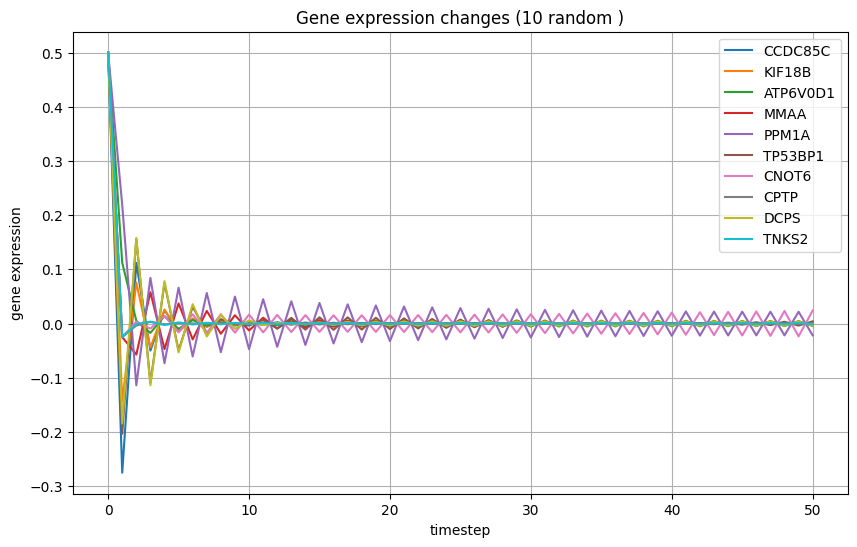

In [5]:
n_samples, n_states = xs.shape
idx = np.random.choice(n_states, size=10, replace=False)
genes = pd.read_csv('./o2/genes_order.csv', header=None)[0].astype(str)

plt.figure(figsize=(10,6))
x = np.arange(n_samples)
for i in idx:
    gene = genes.iloc[int(i)]
    plt.plot(x, xs[:, i], label=f'{gene}')
plt.xlabel('timestep')
plt.ylabel('gene expression')
plt.title('Gene expression changes (10 random )')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# select genes by how slowly they change over time (small absolute trend/slope),
# not by total amplitude. use linear slope magnitude as the metric.

# use existing time vector `x` (length n_samples)
t = x.astype(float)
t_centered = t - t.mean()
den = np.sum(t_centered**2)

# compute slope for each gene (vectorized)
slopes = t_centered.dot(xs) / den    # shape (n_states,)

# rank by absolute slope (smallest = slowest trend)
order_by_slope = np.argsort(np.abs(slopes))
top_n = 20
slow_idx = order_by_slope[:top_n]

# ensure supporting summary stats exist, compute if not
try:
    mad
except NameError:
    mad = np.mean(np.abs(np.diff(xs, axis=0)), axis=0)   # mean absolute step change

try:
    stds
except NameError:
    stds = np.std(xs, axis=0)

try:
    ranges
except NameError:
    ranges = np.ptp(xs, axis=0)

slow_genes = pd.DataFrame({
    'gene_index': slow_idx,
    'gene': genes.iloc[slow_idx].values,
    'slope': slopes[slow_idx],
    'abs_slope': np.abs(slopes[slow_idx]),
    'mean_abs_diff': mad[slow_idx],
    'std': stds[slow_idx],
    'range': ranges[slow_idx]
})

print(slow_genes)

    gene_index       gene     slope  abs_slope  mean_abs_diff       std  \
0         6036     RSPRY1 -0.000156   0.000156       0.272383  0.242518   
1         1504     COMMD5 -0.000174   0.000174       0.038545  0.099311   
2         2233     ERLIN1 -0.000181   0.000181       0.085320  0.136327   
3         3878     LSM14B -0.000228   0.000228       0.049292  0.099554   
4         5604     RAB11A -0.000233   0.000233       0.074657  0.121127   
5         6553     SNAPC2 -0.000240   0.000240       0.192192  0.129958   
6         1340     CHMP2B -0.000246   0.000246       0.051284  0.094085   
7         4469     NDFIP1 -0.000259   0.000259       0.062366  0.099747   
8         5816       RGS2 -0.000279   0.000279       0.086420  0.126357   
9         3754  LINC02913 -0.000282   0.000282       0.054829  0.101167   
10        3948     MAN1A1 -0.000305   0.000305       0.057310  0.100696   
11        1411       CLN3 -0.000307   0.000307       0.054638  0.095100   
12        8287    ZNF702P

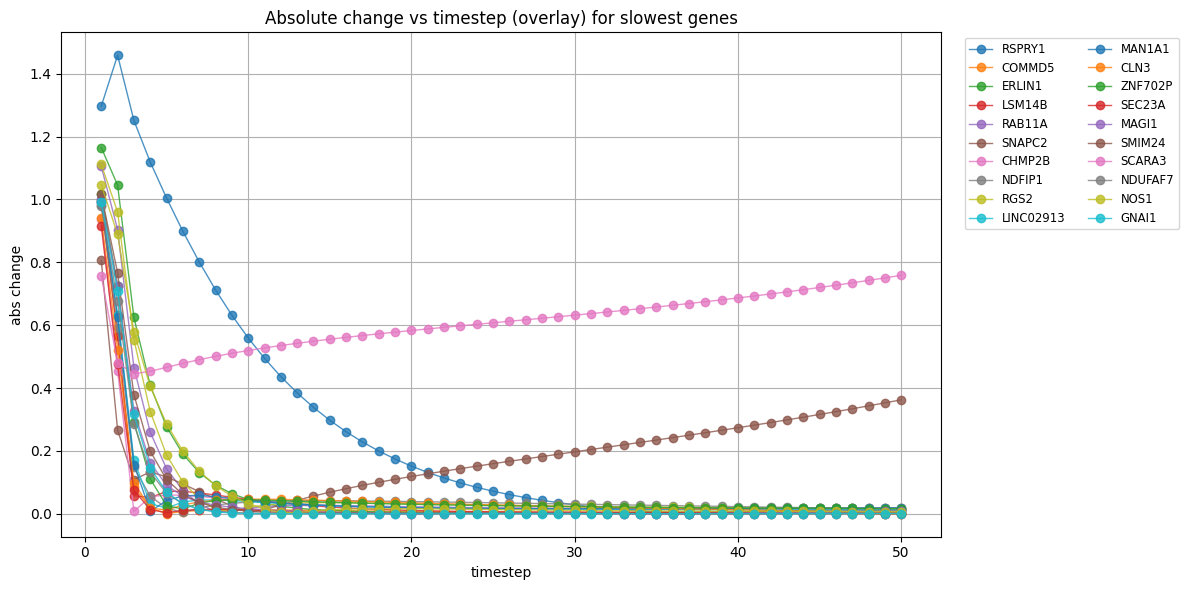

In [7]:
try:
    time_idx
except NameError:
    time_idx = t[1:]  # timesteps corresponding to the abs changes (n_samples-1)

try:
    changes
except NameError:
    changes = np.abs(np.diff(xs, axis=0))
plt.figure(figsize=(12,6))
for gidx in slow_idx:
    plt.plot(time_idx, changes[:, int(gidx)],
             marker='o', linestyle='-',
             alpha=0.8, linewidth=1,
             label=genes.iloc[int(gidx)])

plt.xlabel('timestep')
plt.ylabel('abs change')
plt.title('Absolute change vs timestep (overlay) for slowest genes')
plt.grid(True)
plt.legend(ncol=2, fontsize='small', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [8]:
file = np.load("./simulation_history_500.npz")

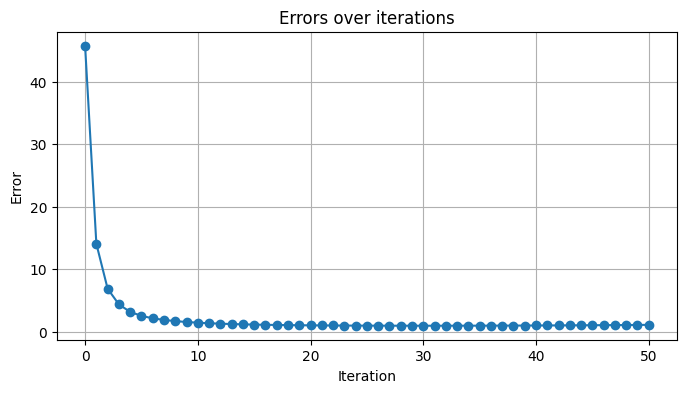

In [9]:
xs = file["Xs"]
us = file["Us"]
errors = file["errs"]

plt.figure(figsize=(8,4))
plt.plot(errors, marker='o', linestyle='-')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Errors over iterations')
plt.grid(True)
plt.show()

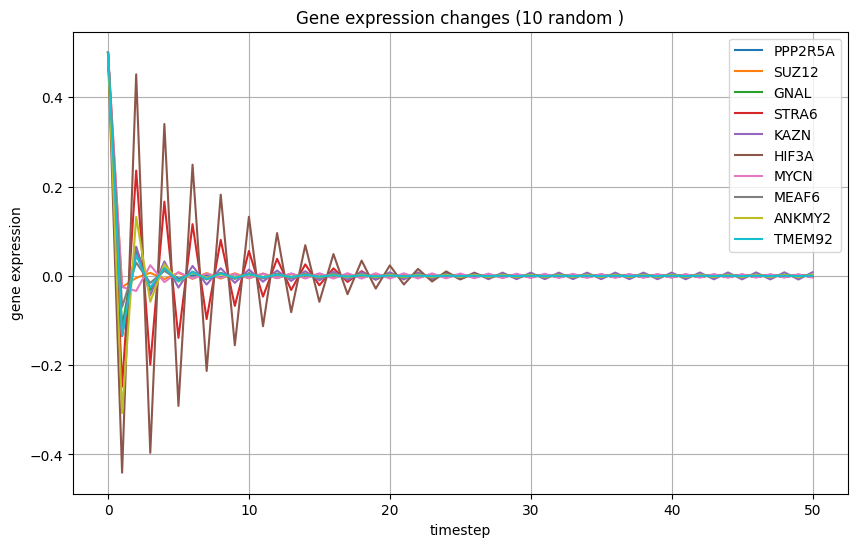

In [10]:
n_samples, n_states = xs.shape
idx = np.random.choice(n_states, size=10, replace=False)
genes = pd.read_csv('./o2/genes_order.csv', header=None)[0].astype(str)

plt.figure(figsize=(10,6))
x = np.arange(n_samples)
for i in idx:
    gene = genes.iloc[int(i)]
    plt.plot(x, xs[:, i], label=f'{gene}')
plt.xlabel('timestep')
plt.ylabel('gene expression')
plt.title('Gene expression changes (10 random )')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# select genes by how slowly they change over time (small absolute trend/slope),
# not by total amplitude. use linear slope magnitude as the metric.

# use existing time vector `x` (length n_samples)
t = x.astype(float)
t_centered = t - t.mean()
den = np.sum(t_centered**2)

# compute slope for each gene (vectorized)
slopes = t_centered.dot(xs) / den    # shape (n_states,)

# rank by absolute slope (smallest = slowest trend)
order_by_slope = np.argsort(np.abs(slopes))
top_n = 20
slow_idx = order_by_slope[:top_n]

# ensure supporting summary stats exist, compute if not
try:
    mad
except NameError:
    mad = np.mean(np.abs(np.diff(xs, axis=0)), axis=0)   # mean absolute step change

try:
    stds
except NameError:
    stds = np.std(xs, axis=0)

try:
    ranges
except NameError:
    ranges = np.ptp(xs, axis=0)

slow_genes = pd.DataFrame({
    'gene_index': slow_idx,
    'gene': genes.iloc[slow_idx].values,
    'slope': slopes[slow_idx],
    'abs_slope': np.abs(slopes[slow_idx]),
    'mean_abs_diff': mad[slow_idx],
    'std': stds[slow_idx],
    'range': ranges[slow_idx]
})

print(slow_genes)

    gene_index       gene     slope  abs_slope  mean_abs_diff       std  \
0         6036     RSPRY1 -0.000160   0.000160       0.272383  0.242518   
1         2233     ERLIN1 -0.000162   0.000162       0.085320  0.136327   
2         1504     COMMD5 -0.000169   0.000169       0.038545  0.099311   
3          767       BRF1 -0.000197   0.000197       0.012437  0.069970   
4         3878     LSM14B -0.000214   0.000214       0.049292  0.099554   
5         5604     RAB11A -0.000228   0.000228       0.074657  0.121127   
6         1340     CHMP2B -0.000234   0.000234       0.051284  0.094085   
7         6553     SNAPC2 -0.000244   0.000244       0.192192  0.129958   
8         4469     NDFIP1 -0.000260   0.000260       0.062366  0.099747   
9         5816       RGS2 -0.000277   0.000277       0.086420  0.126357   
10        6247     SH3BP4 -0.000282   0.000282       0.017985  0.069873   
11        3754  LINC02913 -0.000286   0.000286       0.054829  0.101167   
12        1411       CLN3

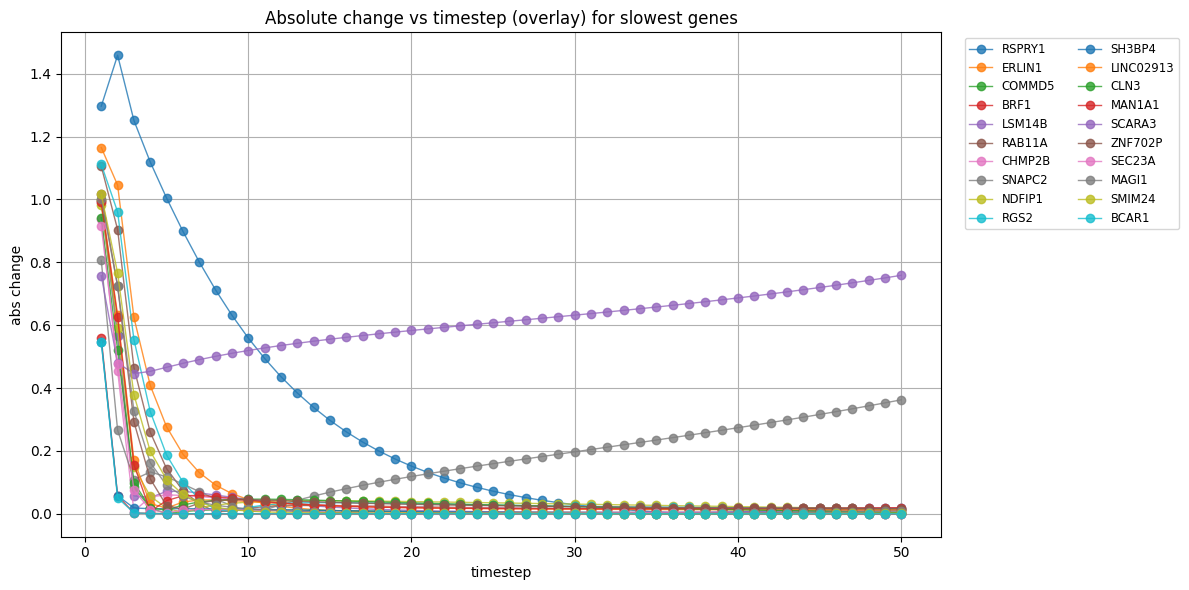

In [12]:
try:
    time_idx
except NameError:
    time_idx = t[1:]  # timesteps corresponding to the abs changes (n_samples-1)

try:
    changes
except NameError:
    changes = np.abs(np.diff(xs, axis=0))
plt.figure(figsize=(12,6))
for gidx in slow_idx:
    plt.plot(time_idx, changes[:, int(gidx)],
             marker='o', linestyle='-',
             alpha=0.8, linewidth=1,
             label=genes.iloc[int(gidx)])

plt.xlabel('timestep')
plt.ylabel('abs change')
plt.title('Absolute change vs timestep (overlay) for slowest genes')
plt.grid(True)
plt.legend(ncol=2, fontsize='small', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [13]:
file = np.load("./simulation_history_300.npz")

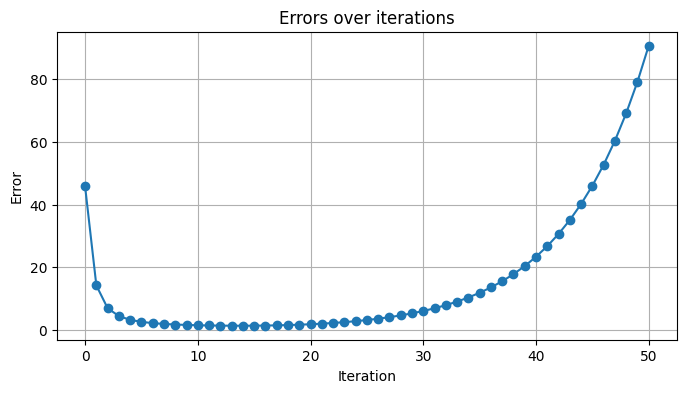

In [14]:
xs = file["Xs"]
us = file["Us"]
errors = file["errs"]

plt.figure(figsize=(8,4))
plt.plot(errors, marker='o', linestyle='-')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Errors over iterations')
plt.grid(True)
plt.show()

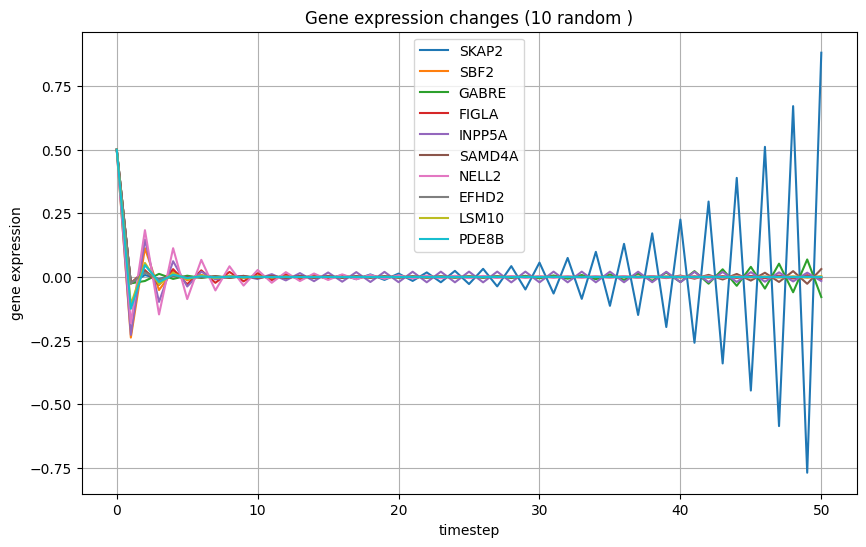

In [15]:
n_samples, n_states = xs.shape
idx = np.random.choice(n_states, size=10, replace=False)
genes = pd.read_csv('./o2/genes_order.csv', header=None)[0].astype(str)

plt.figure(figsize=(10,6))
x = np.arange(n_samples)
for i in idx:
    gene = genes.iloc[int(i)]
    plt.plot(x, xs[:, i], label=f'{gene}')
plt.xlabel('timestep')
plt.ylabel('gene expression')
plt.title('Gene expression changes (10 random )')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
# select genes by how slowly they change over time (small absolute trend/slope),
# not by total amplitude. use linear slope magnitude as the metric.

# use existing time vector `x` (length n_samples)
t = x.astype(float)
t_centered = t - t.mean()
den = np.sum(t_centered**2)

# compute slope for each gene (vectorized)
slopes = t_centered.dot(xs) / den    # shape (n_states,)

# rank by absolute slope (smallest = slowest trend)
order_by_slope = np.argsort(np.abs(slopes))
top_n = 20
slow_idx = order_by_slope[:top_n]

# ensure supporting summary stats exist, compute if not
try:
    mad
except NameError:
    mad = np.mean(np.abs(np.diff(xs, axis=0)), axis=0)   # mean absolute step change

try:
    stds
except NameError:
    stds = np.std(xs, axis=0)

try:
    ranges
except NameError:
    ranges = np.ptp(xs, axis=0)

slow_genes = pd.DataFrame({
    'gene_index': slow_idx,
    'gene': genes.iloc[slow_idx].values,
    'slope': slopes[slow_idx],
    'abs_slope': np.abs(slopes[slow_idx]),
    'mean_abs_diff': mad[slow_idx],
    'std': stds[slow_idx],
    'range': ranges[slow_idx]
})

print(slow_genes)

    gene_index     gene         slope     abs_slope  mean_abs_diff       std  \
0         6310    SKAP2 -6.682996e-07  6.682996e-07       0.014687  0.069507   
1         7736      UXT  1.606584e-06  1.606584e-06       0.034186  0.077669   
2          355    ANXA6  1.884835e-06  1.884835e-06       0.064105  0.078327   
3         6654  SPATA2L  4.211129e-06  4.211129e-06       0.028928  0.078398   
4          878  C1orf94 -6.186561e-06  6.186561e-06       0.046617  0.094896   
5         4548    NFIL3  1.043439e-05  1.043439e-05       0.027784  0.080324   
6         7883     WNT6  1.350822e-05  1.350822e-05       0.014302  0.069525   
7          162    ADPRM  1.398857e-05  1.398857e-05       0.018526  0.072018   
8         1915   DNAJC8 -2.328904e-05  2.328904e-05       0.046615  0.072652   
9         2047     ECI2  2.621159e-05  2.621159e-05       0.080437  0.098269   
10        4621     NOL3  2.767218e-05  2.767218e-05       0.012498  0.069668   
11        4510     NEFH -3.347693e-05  3

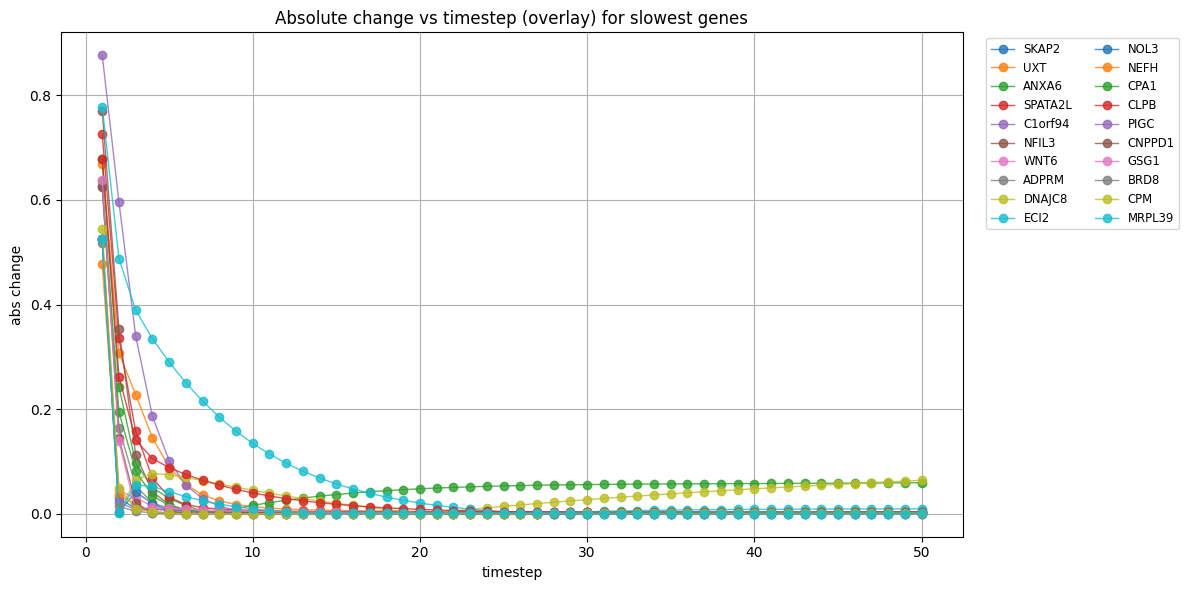

In [17]:
try:
    time_idx
except NameError:
    time_idx = t[1:]  # timesteps corresponding to the abs changes (n_samples-1)

try:
    changes
except NameError:
    changes = np.abs(np.diff(xs, axis=0))
plt.figure(figsize=(12,6))
for gidx in slow_idx:
    plt.plot(time_idx, changes[:, int(gidx)],
             marker='o', linestyle='-',
             alpha=0.8, linewidth=1,
             label=genes.iloc[int(gidx)])

plt.xlabel('timestep')
plt.ylabel('abs change')
plt.title('Absolute change vs timestep (overlay) for slowest genes')
plt.grid(True)
plt.legend(ncol=2, fontsize='small', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [18]:
file = np.load("./simulation_history_27.npz")


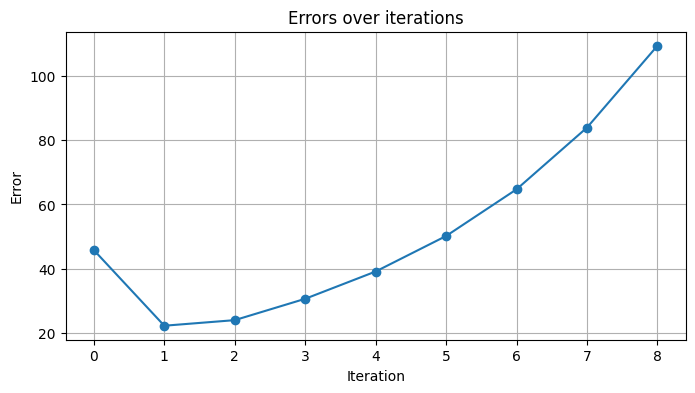

In [19]:
xs = file["Xs"]
us = file["Us"]
errors = file["errs"]

plt.figure(figsize=(8,4))
plt.plot(errors, marker='o', linestyle='-')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Errors over iterations')
plt.grid(True)
plt.show()

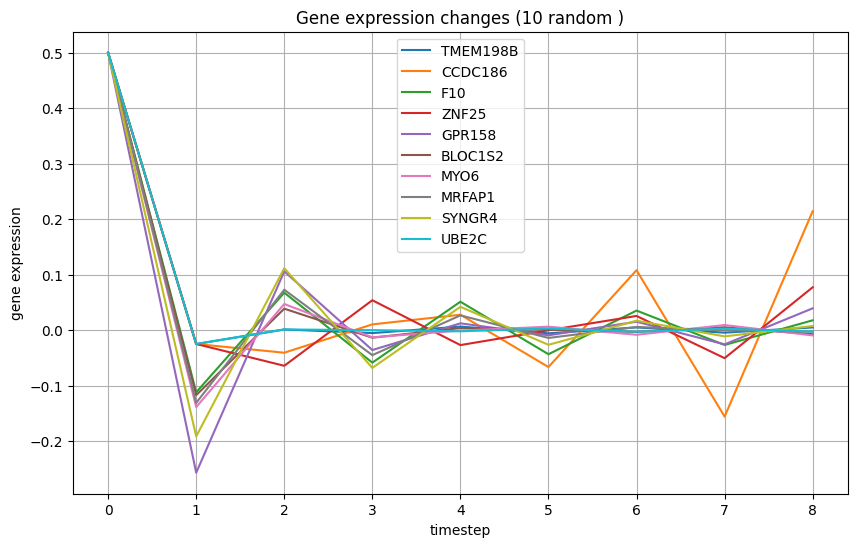

In [20]:
n_samples, n_states = xs.shape
idx = np.random.choice(n_states, size=10, replace=False)
genes = pd.read_csv('./o2/genes_order.csv', header=None)[0].astype(str)

plt.figure(figsize=(10,6))
x = np.arange(n_samples)
for i in idx:
    gene = genes.iloc[int(i)]
    plt.plot(x, xs[:, i], label=f'{gene}')
plt.xlabel('timestep')
plt.ylabel('gene expression')
plt.title('Gene expression changes (10 random )')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
# select genes by how slowly they change over time (small absolute trend/slope),
# not by total amplitude. use linear slope magnitude as the metric.

# use existing time vector `x` (length n_samples)
t = x.astype(float)
t_centered = t - t.mean()
den = np.sum(t_centered**2)

# compute slope for each gene (vectorized)
slopes = t_centered.dot(xs) / den    # shape (n_states,)

# rank by absolute slope (smallest = slowest trend)
order_by_slope = np.argsort(np.abs(slopes))
top_n = 20
slow_idx = order_by_slope[:top_n]

# ensure supporting summary stats exist, compute if not
try:
    mad
except NameError:
    mad = np.mean(np.abs(np.diff(xs, axis=0)), axis=0)   # mean absolute step change

try:
    stds
except NameError:
    stds = np.std(xs, axis=0)

try:
    ranges
except NameError:
    ranges = np.ptp(xs, axis=0)

slow_genes = pd.DataFrame({
    'gene_index': slow_idx,
    'gene': genes.iloc[slow_idx].values,
    'slope': slopes[slow_idx],
    'abs_slope': np.abs(slopes[slow_idx]),
    'mean_abs_diff': mad[slow_idx],
    'std': stds[slow_idx],
    'range': ranges[slow_idx]
})

print(slow_genes)

    gene_index       gene     slope  abs_slope  mean_abs_diff       std  \
0         5153    PITPNM3 -0.000119   0.000119       0.041202  0.093944   
1         5352    PPP1R1B -0.000215   0.000215       0.027246  0.070107   
2         2832       GPC4 -0.000278   0.000278       0.012627  0.069493   
3         5842     RICTOR  0.000290   0.000290       0.041866  0.071460   
4         5465       PRR7  0.000336   0.000336       0.020529  0.073292   
5         2661      GATA5 -0.000339   0.000339       0.035494  0.088408   
6         4326       MTF1 -0.000454   0.000454       0.030523  0.078625   
7         3751  LINC01341  0.000514   0.000514       0.022355  0.075442   
8         6777     STAMBP -0.000529   0.000529       0.016133  0.070251   
9          407         AR  0.000586   0.000586       0.026028  0.077061   
10          87      ACSS1  0.000658   0.000658       0.014403  0.069765   
11        1713      DAPK2  0.000786   0.000786       0.028485  0.075805   
12        4491     NDUFB3

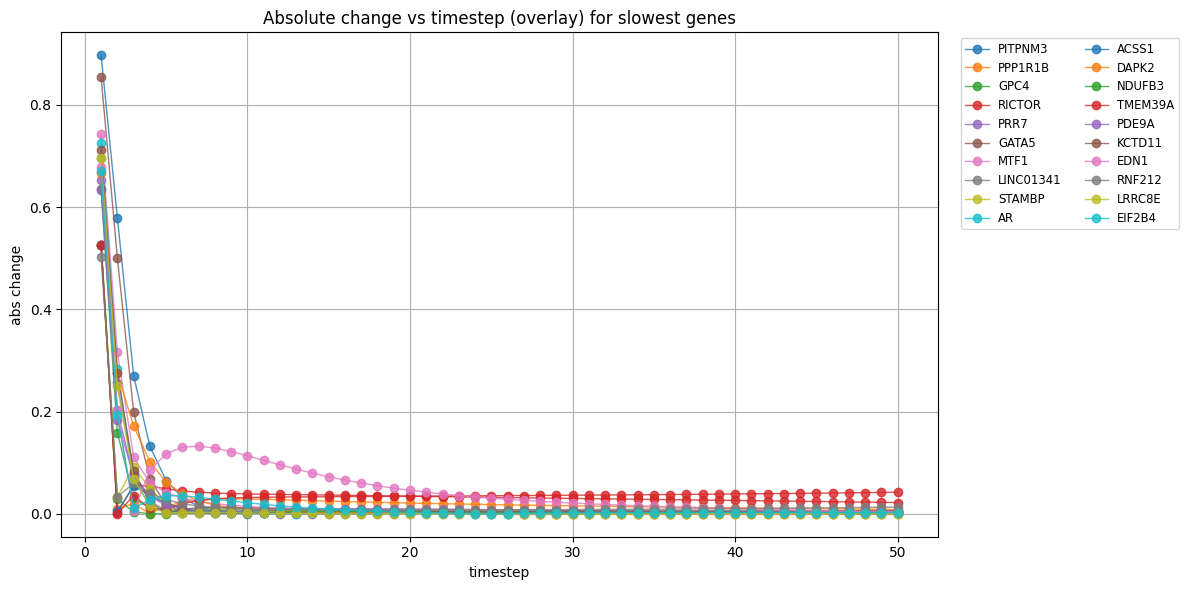

In [22]:
try:
    time_idx
except NameError:
    time_idx = t[1:]  # timesteps corresponding to the abs changes (n_samples-1)

try:
    changes
except NameError:
    changes = np.abs(np.diff(xs, axis=0))
plt.figure(figsize=(12,6))
for gidx in slow_idx:
    plt.plot(time_idx, changes[:, int(gidx)],
             marker='o', linestyle='-',
             alpha=0.8, linewidth=1,
             label=genes.iloc[int(gidx)])

plt.xlabel('timestep')
plt.ylabel('abs change')
plt.title('Absolute change vs timestep (overlay) for slowest genes')
plt.grid(True)
plt.legend(ncol=2, fontsize='small', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()
